<a href="https://colab.research.google.com/github/premalatha16/Premalatha-project-/blob/main/Naan_muthalvan_program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving sample_traffic_accidents.csv to sample_traffic_accidents.csv
Initial Data Sample:
     ID  Severity  Temperature(F)  Humidity(%)  Pressure(in)  Visibility(mi)  \
0  A001         3       67.384666    72.274599     29.603740        8.355559   
1  A002         4       61.713683    83.071428     29.942632       10.487374   
2  A003         1       58.843517    53.925168     30.252494       10.489933   
3  A004         3       56.988963    71.846339     30.432878        8.986114   
4  A005         3       45.214780    72.598828     29.399852        9.057923   

   Wind_Speed(mph) Weather_Condition         City           Start_Time  
0         5.576098             Clear      Phoenix  2023-01-01 00:00:00  
1         4.950958            Cloudy  Los Angeles  2023-01-01 01:00:00  
2         1.898837             Clear     New York  2023-01-01 02:00:00  
3         4.866320             Clear     New York  2023-01-01 03:00:00  
4         3.043296             Clear      Houston  2023-01-01 04:

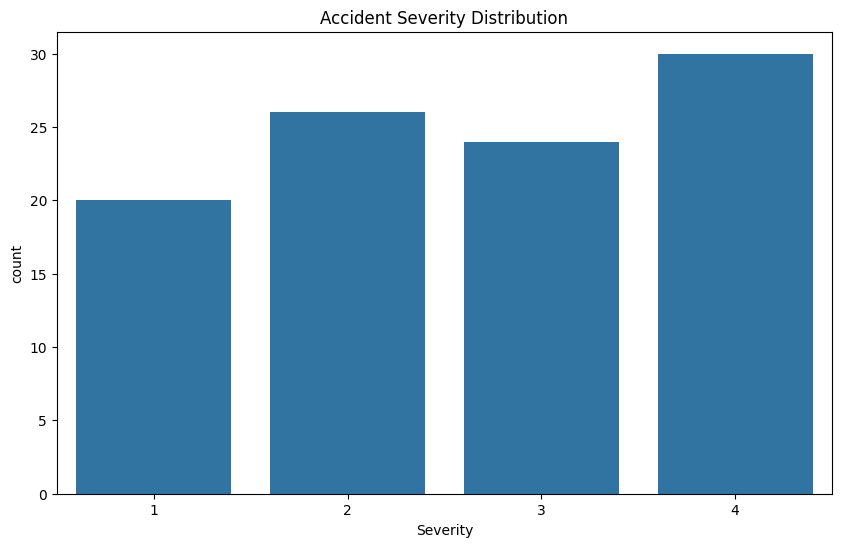

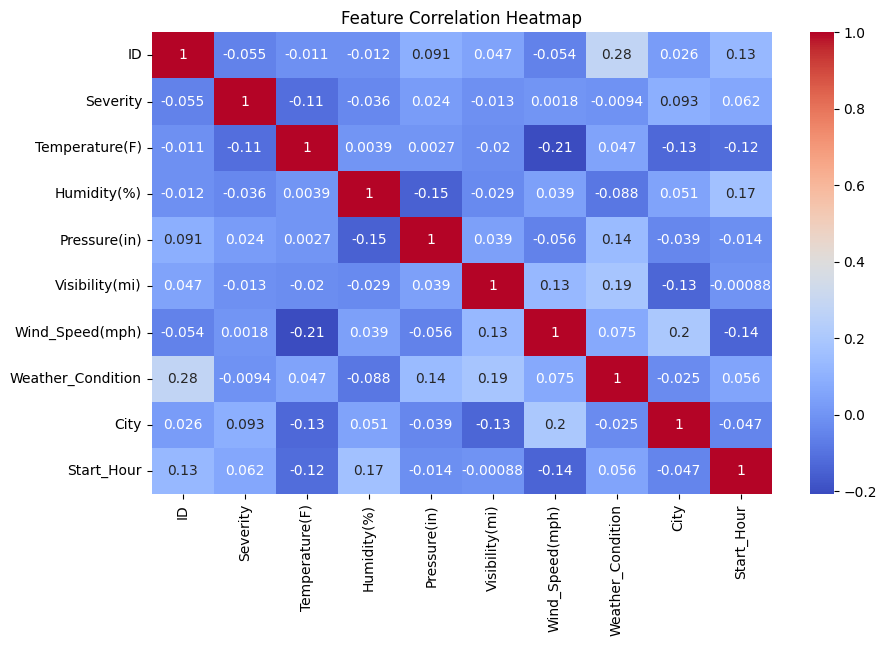

Accuracy: 0.35

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.50      0.50      0.50         4
           3       0.00      0.00      0.00         6
           4       0.42      0.62      0.50         8

    accuracy                           0.35        20
   macro avg       0.23      0.28      0.25        20
weighted avg       0.27      0.35      0.30        20



In [ ]:

from google.colab import files
files.upload()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")

# 1. Load Data
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

# 2. Preprocess Data
def preprocess_data(df):
    # Drop rows with missing target
    df = df.dropna(subset=['Severity'])

    # Fill other missing values
    df = df.fillna(method='ffill')

    # Encode only object-type categorical columns except datetime
    categorical_cols = df.select_dtypes(include='object').columns
    for col in categorical_cols:
        if col != 'Start_Time':
            df[col] = pd.factorize(df[col])[0]

    # Convert Start_Time to datetime if needed
    if 'Start_Time' in df.columns:
        df['Start_Hour'] = pd.to_datetime(df['Start_Time']).dt.hour
        df = df.drop(columns=['Start_Time'])

    return df

# 3. Train Prediction Model
def train_model(df):
    X = df.drop(columns=['Severity'])
    y = df['Severity']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    return model

# 4. Visualizations
def visualize_data(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='Severity')
    plt.title('Accident Severity Distribution')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
    plt.title('Feature Correlation Heatmap')
    plt.show()

# 5. Main function
def main():
    # Replace with your actual CSV file name
    df = load_data("sample_traffic_accidents.csv")

    print("Initial Data Sample:")
    print(df.head())

    df = preprocess_data(df)
    visualize_data(df)
    model = train_model(df)

if __name__ == "__main__":
    main()

Dataset Shape: (100, 10)

Data Types:
 ID                    object
Severity               int64
Temperature(F)       float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Speed(mph)      float64
Weather_Condition     object
City                  object
Start_Time            object
dtype: object

First 5 Rows:
      ID  Severity  Temperature(F)  Humidity(%)  Pressure(in)  Visibility(mi)  \
0  A001         3       67.384666    72.274599     29.603740        8.355559   
1  A002         4       61.713683    83.071428     29.942632       10.487374   
2  A003         1       58.843517    53.925168     30.252494       10.489933   
3  A004         3       56.988963    71.846339     30.432878        8.986114   
4  A005         3       45.214780    72.598828     29.399852        9.057923   

   Wind_Speed(mph) Weather_Condition         City           Start_Time  
0         5.576098             Clear      Phoenix  2023-01-01 00:00:00  
1         4.95

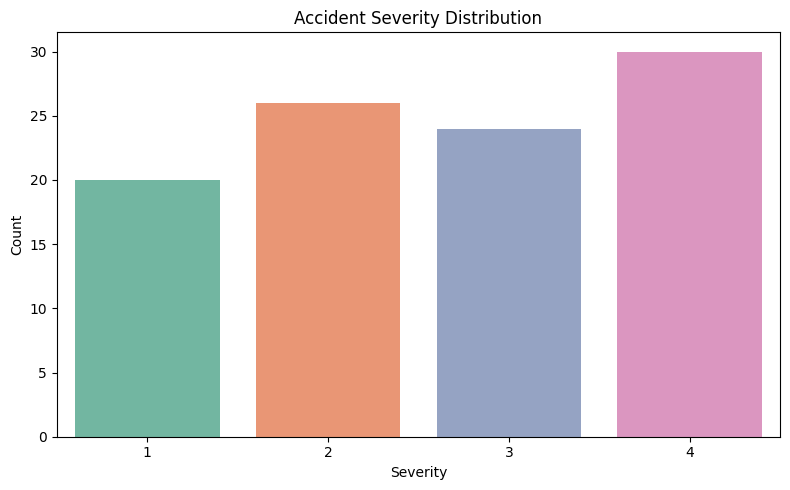

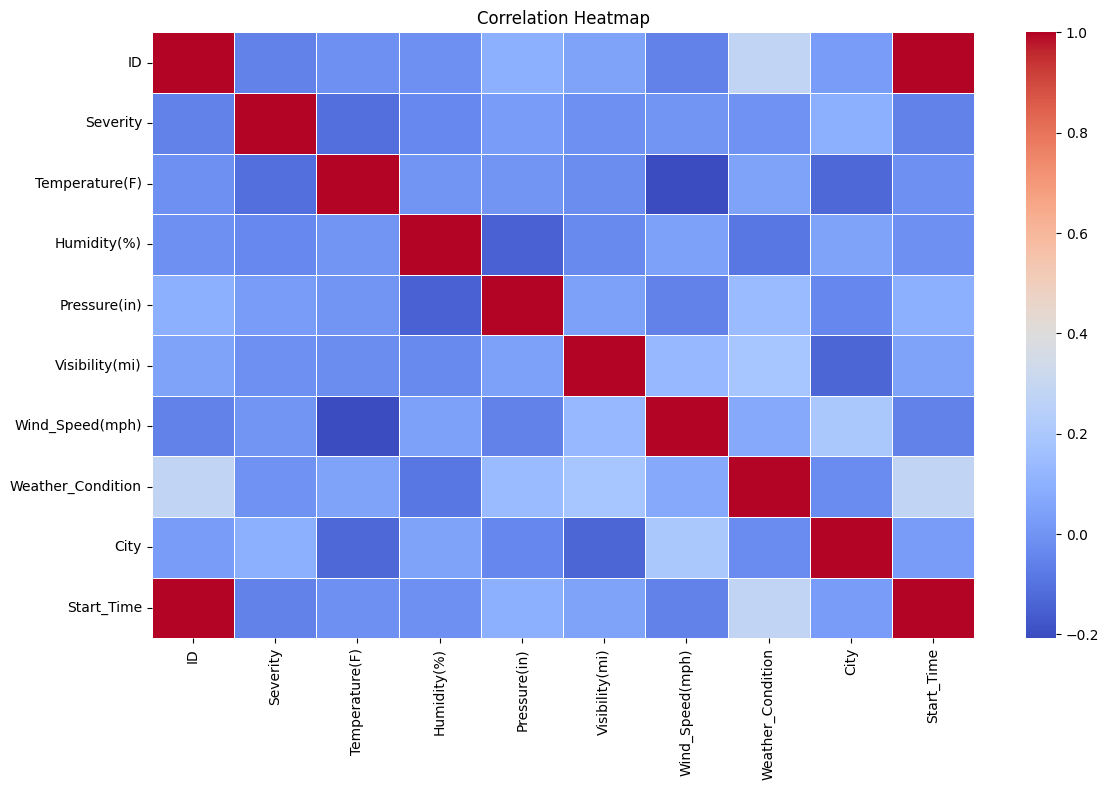

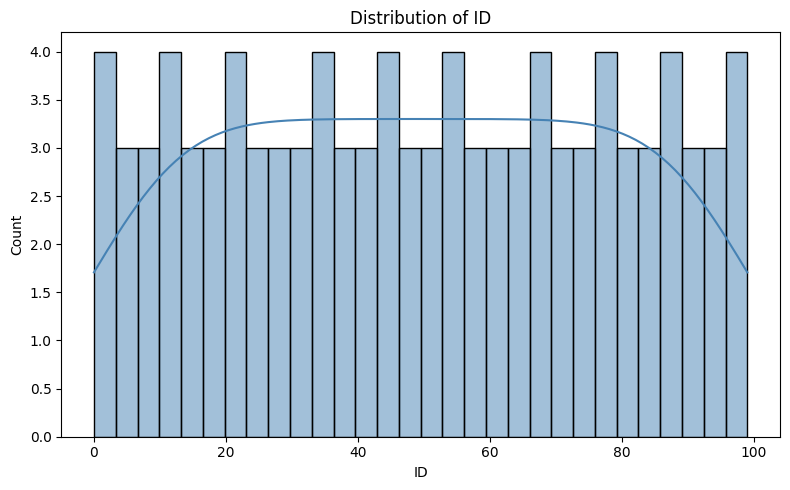

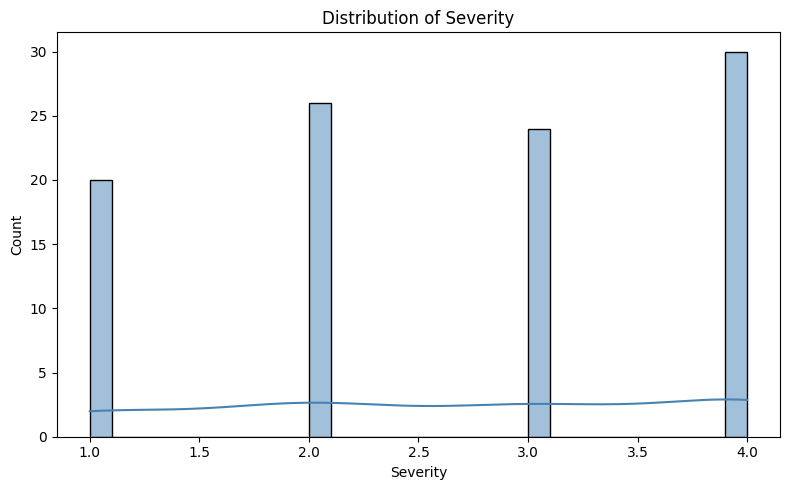

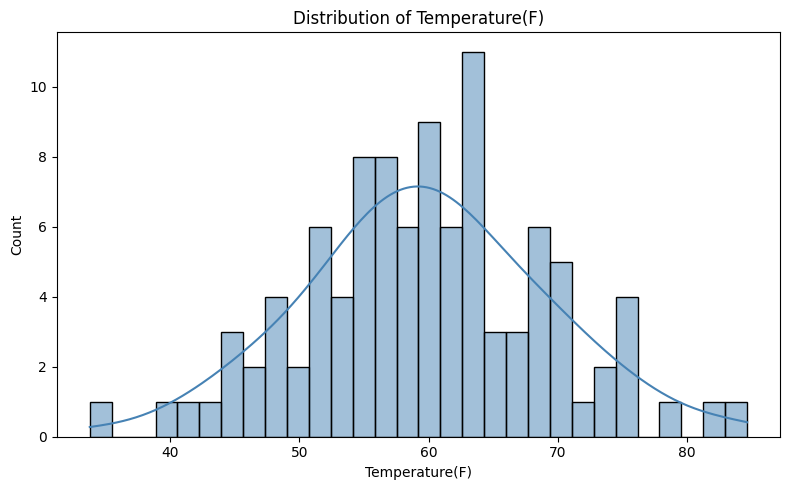

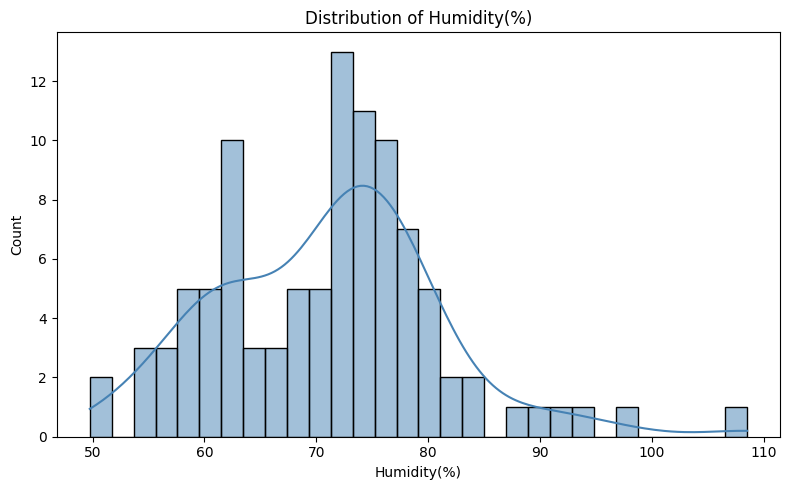

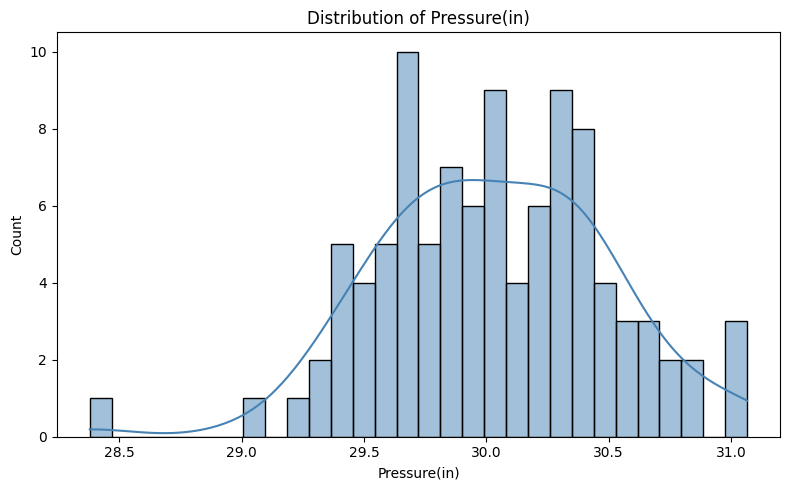

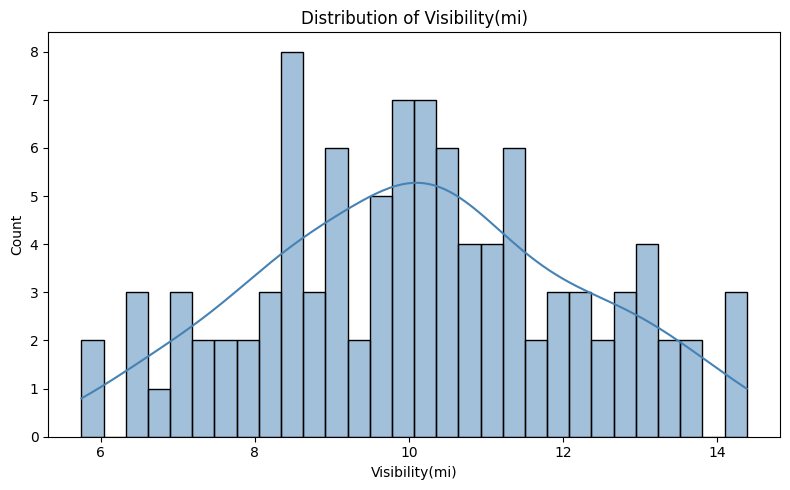

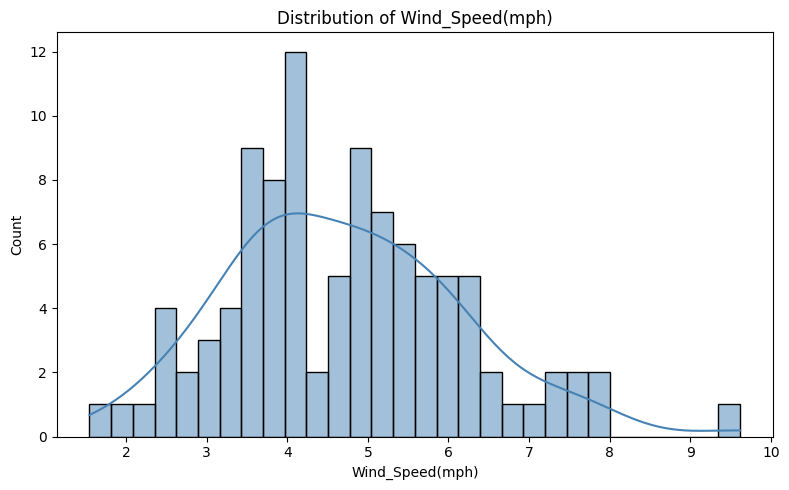

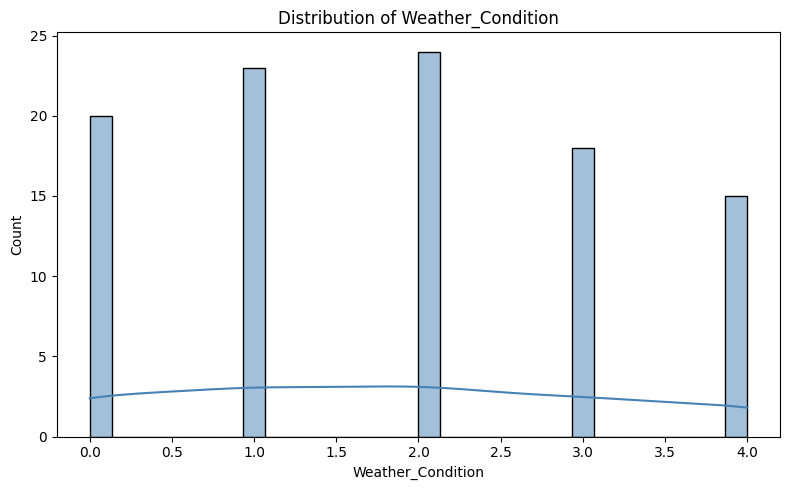

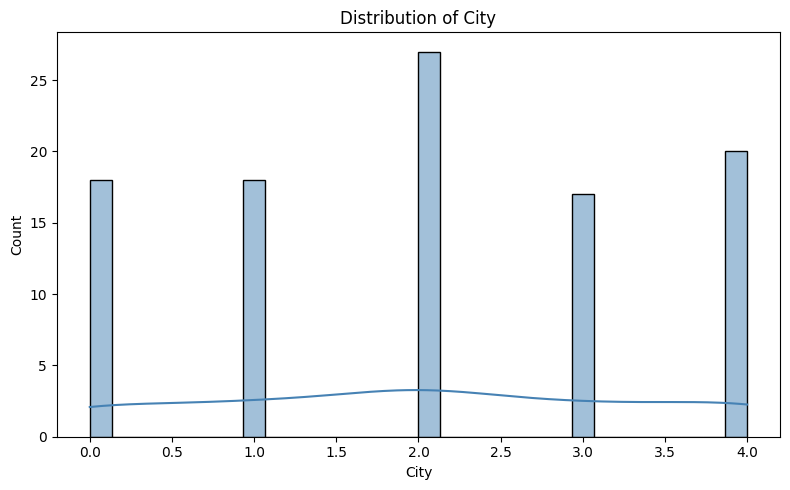

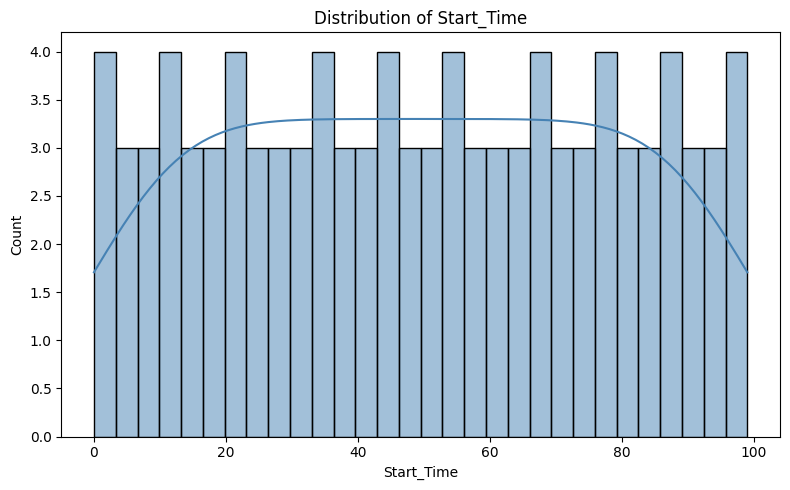

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("sample_traffic_accidents.csv")  # Replace with your actual file path

# --- 1. Basic Info ---
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nFirst 5 Rows:\n", df.head())

# --- 2. Missing Values ---
print("\nMissing Values:\n", df.isnull().sum())

# --- 3. Basic Statistics ---
print("\nStatistical Summary:\n", df.describe())

# --- 4. Convert Categorical Columns for EDA (optional) ---
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = pd.factorize(df[col])[0]

# --- 5. Severity Distribution ---
if 'Severity' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='Severity', data=df, palette='Set2')
    plt.title('Accident Severity Distribution')
    plt.xlabel('Severity')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# --- 6. Correlation Heatmap ---
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# --- 7. Distribution of Numerical Features ---
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=30, kde=True, color='steelblue')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

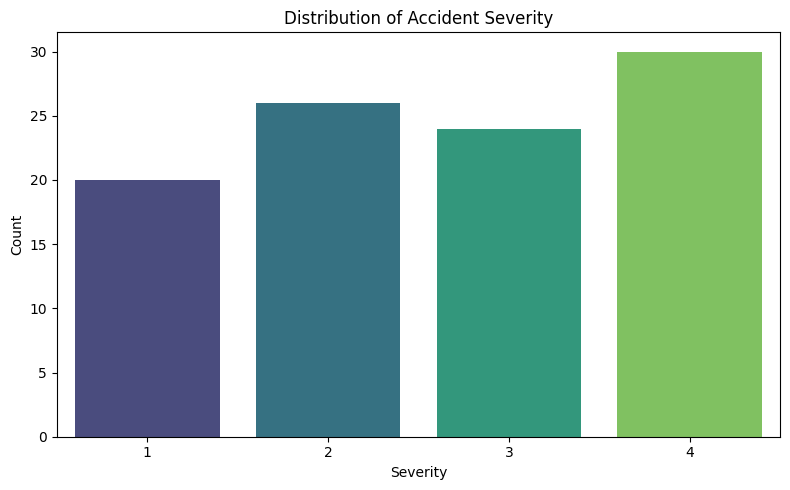

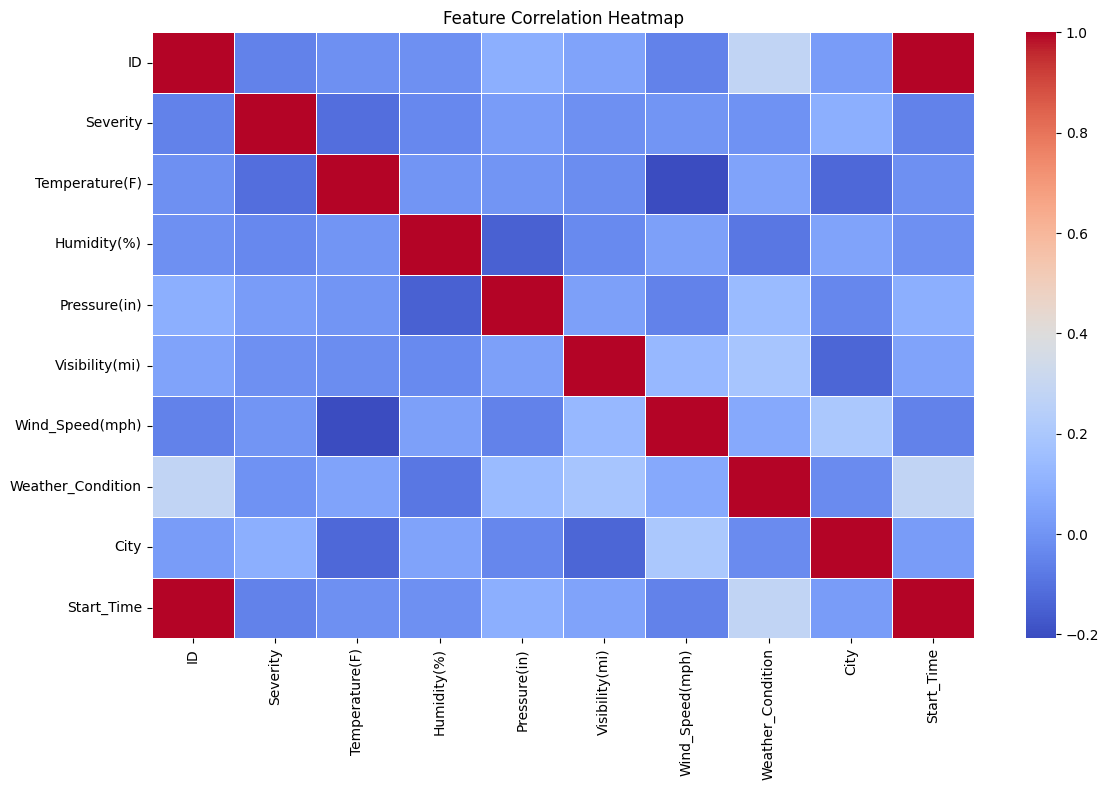

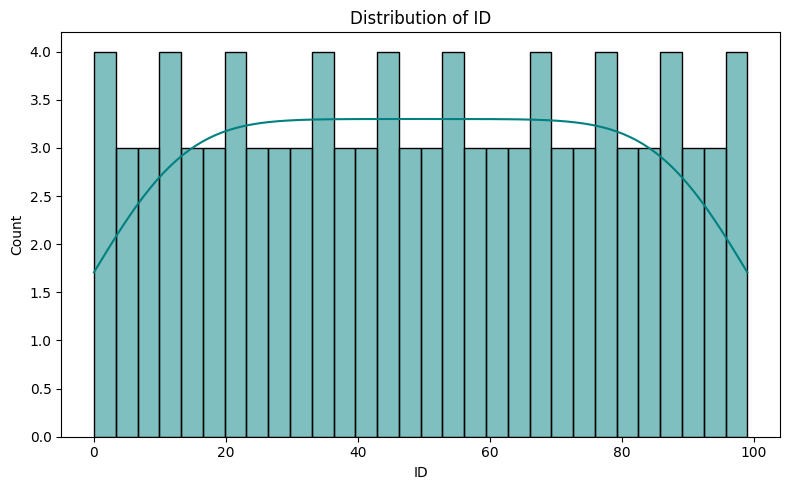

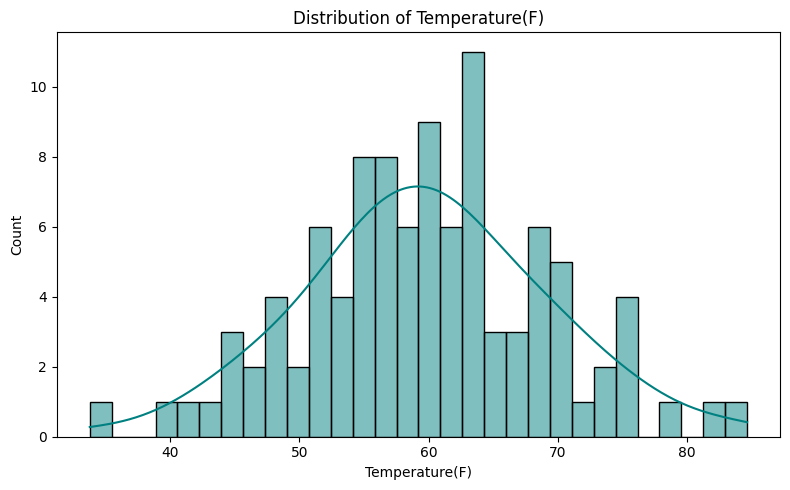

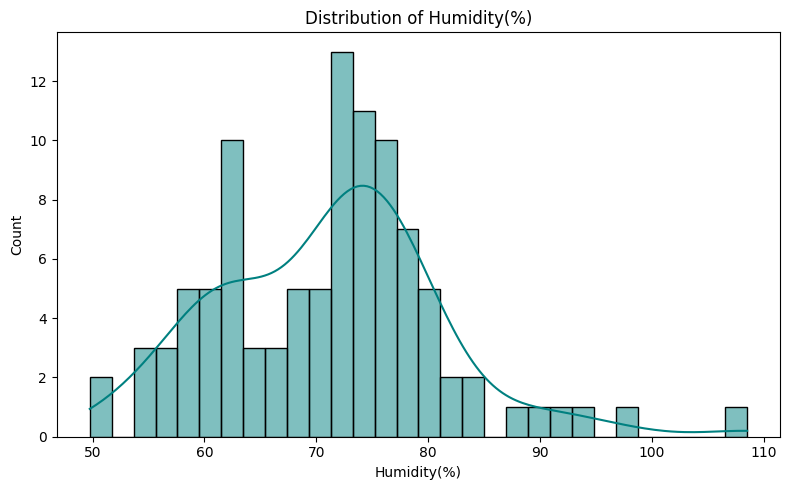

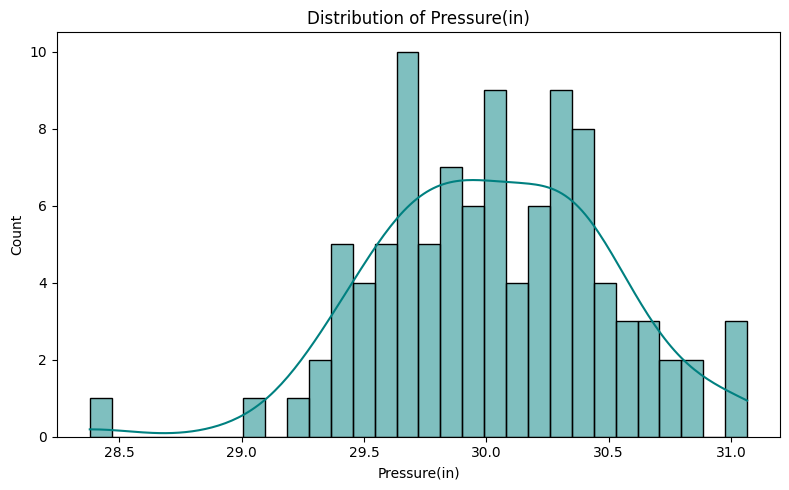

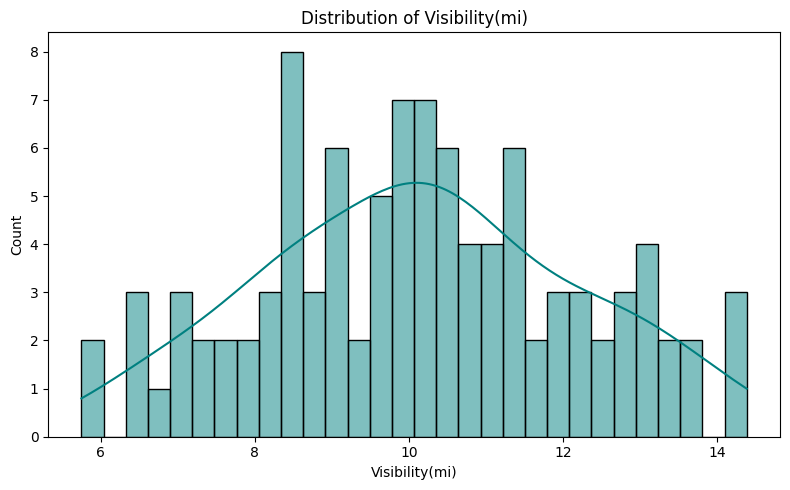

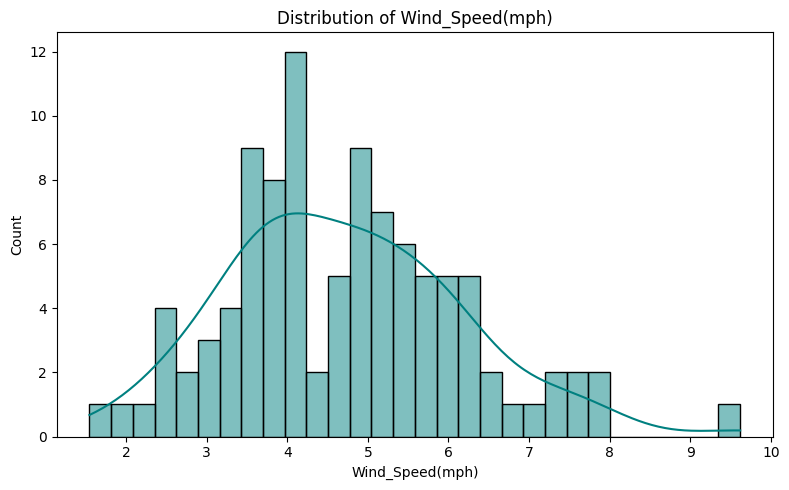

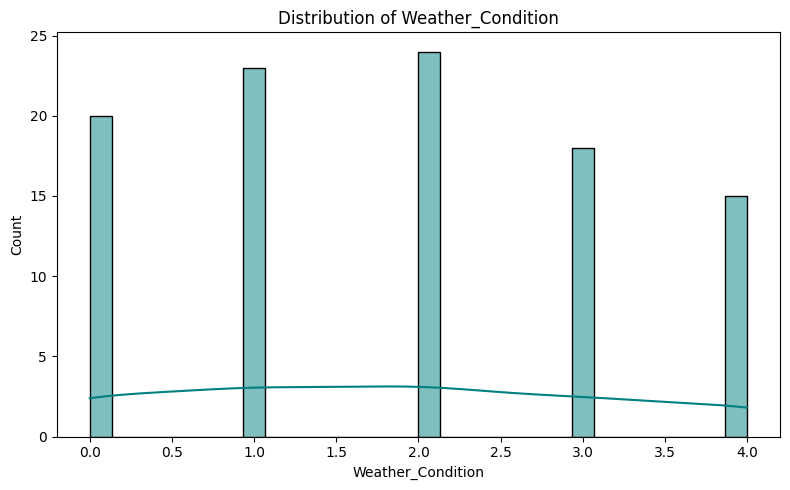

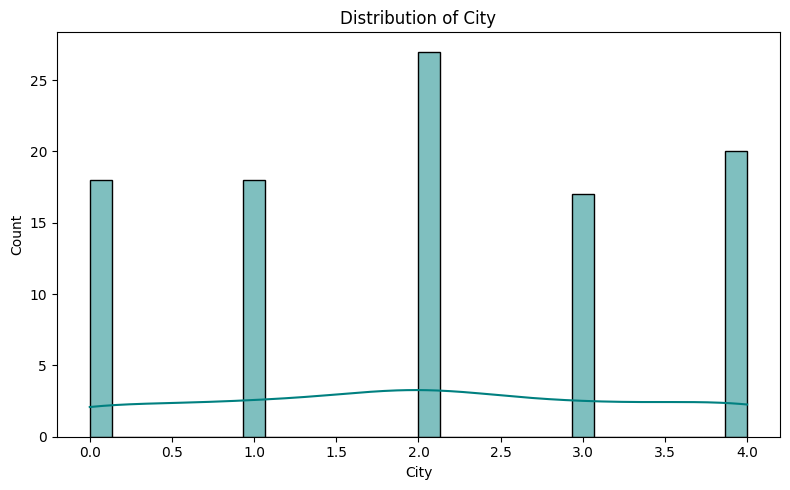

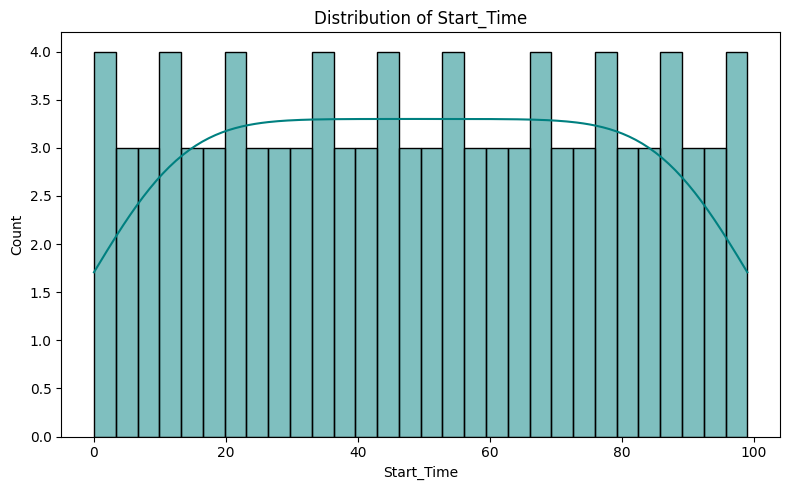

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("sample_traffic_accidents.csv")  # Replace with your actual file path

# Drop rows with missing target if needed
df = df.dropna(subset=['Severity'])

# Fill missing values (optional based on your data)
df = df.fillna(method='ffill')

# Convert categorical columns to numeric if needed (for correlation plot)
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = pd.factorize(df[col])[0]

# --- 1. Severity Distribution ---
plt.figure(figsize=(8, 5))
sns.countplot(x='Severity', data=df, palette='viridis')
plt.title('Distribution of Accident Severity')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# --- 2. Correlation Heatmap ---
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# --- 3. Histograms of Numeric Features ---
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Severity')
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30, color='teal')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [ ]:

# Step 1: Upload the CSV file
from google.colab import files



from google.colab import files
files.upload()

uploaded = files.upload()

# Step 2: Load the CSV into a DataFrame
import pandas as pd

# Replace the filename below if different
df = pd.read_csv("sample_traffic_accidents.csv")

# Step 3: Display the first few rows
print("Data Preview:")
print(df.head())

Saving sample_traffic_accidents.csv to sample_traffic_accidents (2).csv
